# PCA From Scratch

In this notebook, we implement PCA using standard linear algebra libraries and apply it to a randomly generated dataset.

In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from math import sqrt

# Generating Data
We generate a random dataset by sampling 1000 points from a multivariate normal distribution. We choose the covariance matrix to have left singular vectors $(1,1)$ and $(-1,1)$, and singular values $1$ and $0.1$.

In [2]:
#Generate random data
d=2
n=1000
mean = np.zeros(d)
covariance_diag = np.array([[1,0],[0,0.1]])
covariance_transform = np.array([[sqrt(1/2),-sqrt(1/2)],[sqrt(1/2),sqrt(1/2)]])
covariance = covariance_transform @ covariance_diag @ covariance_transform.transpose()
X = np.random.multivariate_normal(mean,covariance,n)

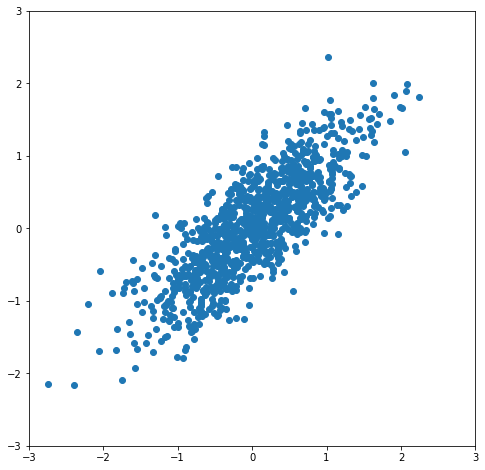

In [3]:
#Plot the
fig, ax = plt.subplots(figsize=(8, 8))
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(X[:,0], X[:,1])

# Applying PCA
Let's implement and apply PCA to this data and see if we can recover the covariance data!

In [4]:
#Implement PCA
def pca(X):
    #Calculate singular values and vectors using the Gram matrix
    eigvals, eigvecs = la.eigh(X.transpose()@X)
    #Sort eigenpairs in descending order of eigenvalue
    sortPlan = (-eigvals).argsort()
    eigvals = eigvals[sortPlan]
    eigvecs = eigvecs[sortPlan]
    #Normalize eigenvalues
    eigvals = eigvals/X.shape[0]
    return (eigvals,eigvecs)

In [5]:
variances, components = pca(X)

In [6]:
print(components)
print(variances)

[[-0.71317817 -0.70098281]
 [ 0.70098281 -0.71317817]]
[0.97754357 0.10238941]


With such a large sample to work with, PCA found excellend approximations of the singular values and vectors of our covariance matrix. Let's plot those components and see what we get.

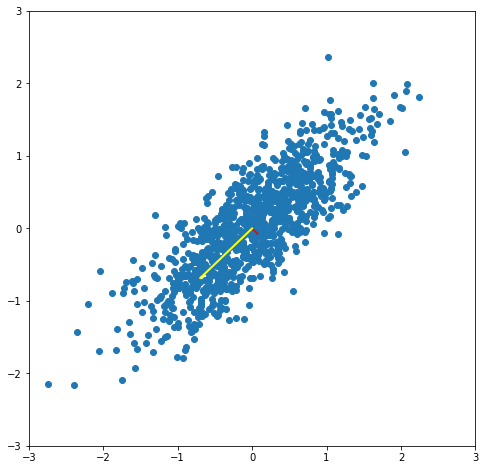

In [7]:
pcaplot = np.array([(components[i])*variances[i] for i in range(d)])

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot([0, pcaplot[1][0]], [0, pcaplot[1][1]], color='red', linewidth=2, label='Component 2')
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.scatter(X[:,0], X[:,1])
ax.plot([0, pcaplot[0][0]], [0, pcaplot[0][1]], color='yellow', linewidth=2, label='Component 1')